## Assignment 1b: Time Series Forecasting

### Kusal Bista a1881044

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### 1.1 Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import  SARIMAX
from  statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from itertools import product
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout  # Import Dropout layer from Keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from sklearn.linear_model import Ridge


In [ ]:
# pip install pmdarima
# !pip install seaborn

In [ ]:
# reading  the dataset
dataset = pd.read_csv("energydata_complete.csv")

In [ ]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#checking the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# checking shape
dataset.shape

(19735, 29)

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [ ]:
# checking for null values
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### 2. Analyse and visualise the data

In [ ]:
df_timeseries = dataset.copy()

In [ ]:
df_timeseries = df_timeseries[['date', 'Appliances']]
# convert the date column of a DataFrame df to a datetime format
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'], format = '%d/%m/%Y %H:%M')

In [ ]:
df_timeseries.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [ ]:
df_timeseries.index = df_timeseries['date']

In [ ]:
df_timeseries.head()

,date,Appliances
date,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60
2016-01-11 17:10:00,2016-01-11 17:10:00,60
2016-01-11 17:20:00,2016-01-11 17:20:00,50
2016-01-11 17:30:00,2016-01-11 17:30:00,50
2016-01-11 17:40:00,2016-01-11 17:40:00,60


In [ ]:
del df_timeseries['date']

In [ ]:
df_timeseries.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


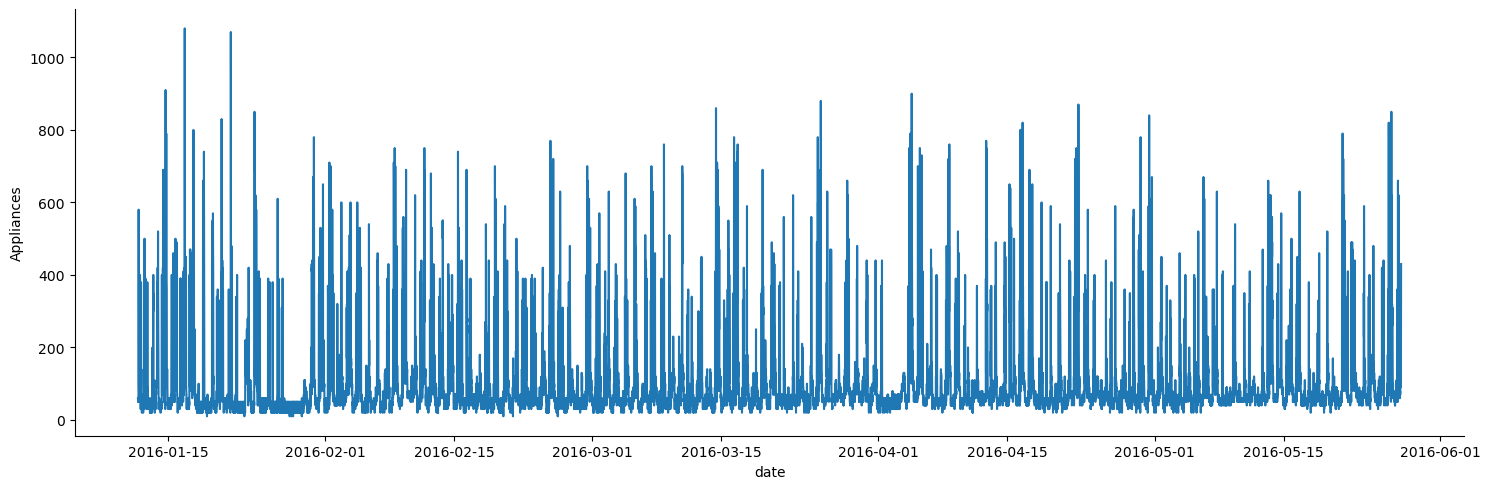

In [ ]:
sns.relplot(data=df_timeseries, x="date", y="Appliances", kind="line", height=5, aspect=3)

**The energy consumption by appliances tends to be higher at the beginning of year, with January 2016 recording the highest usage. Notably, energy consumption by appliance­s peaks at month start and end but varies mid-month.**

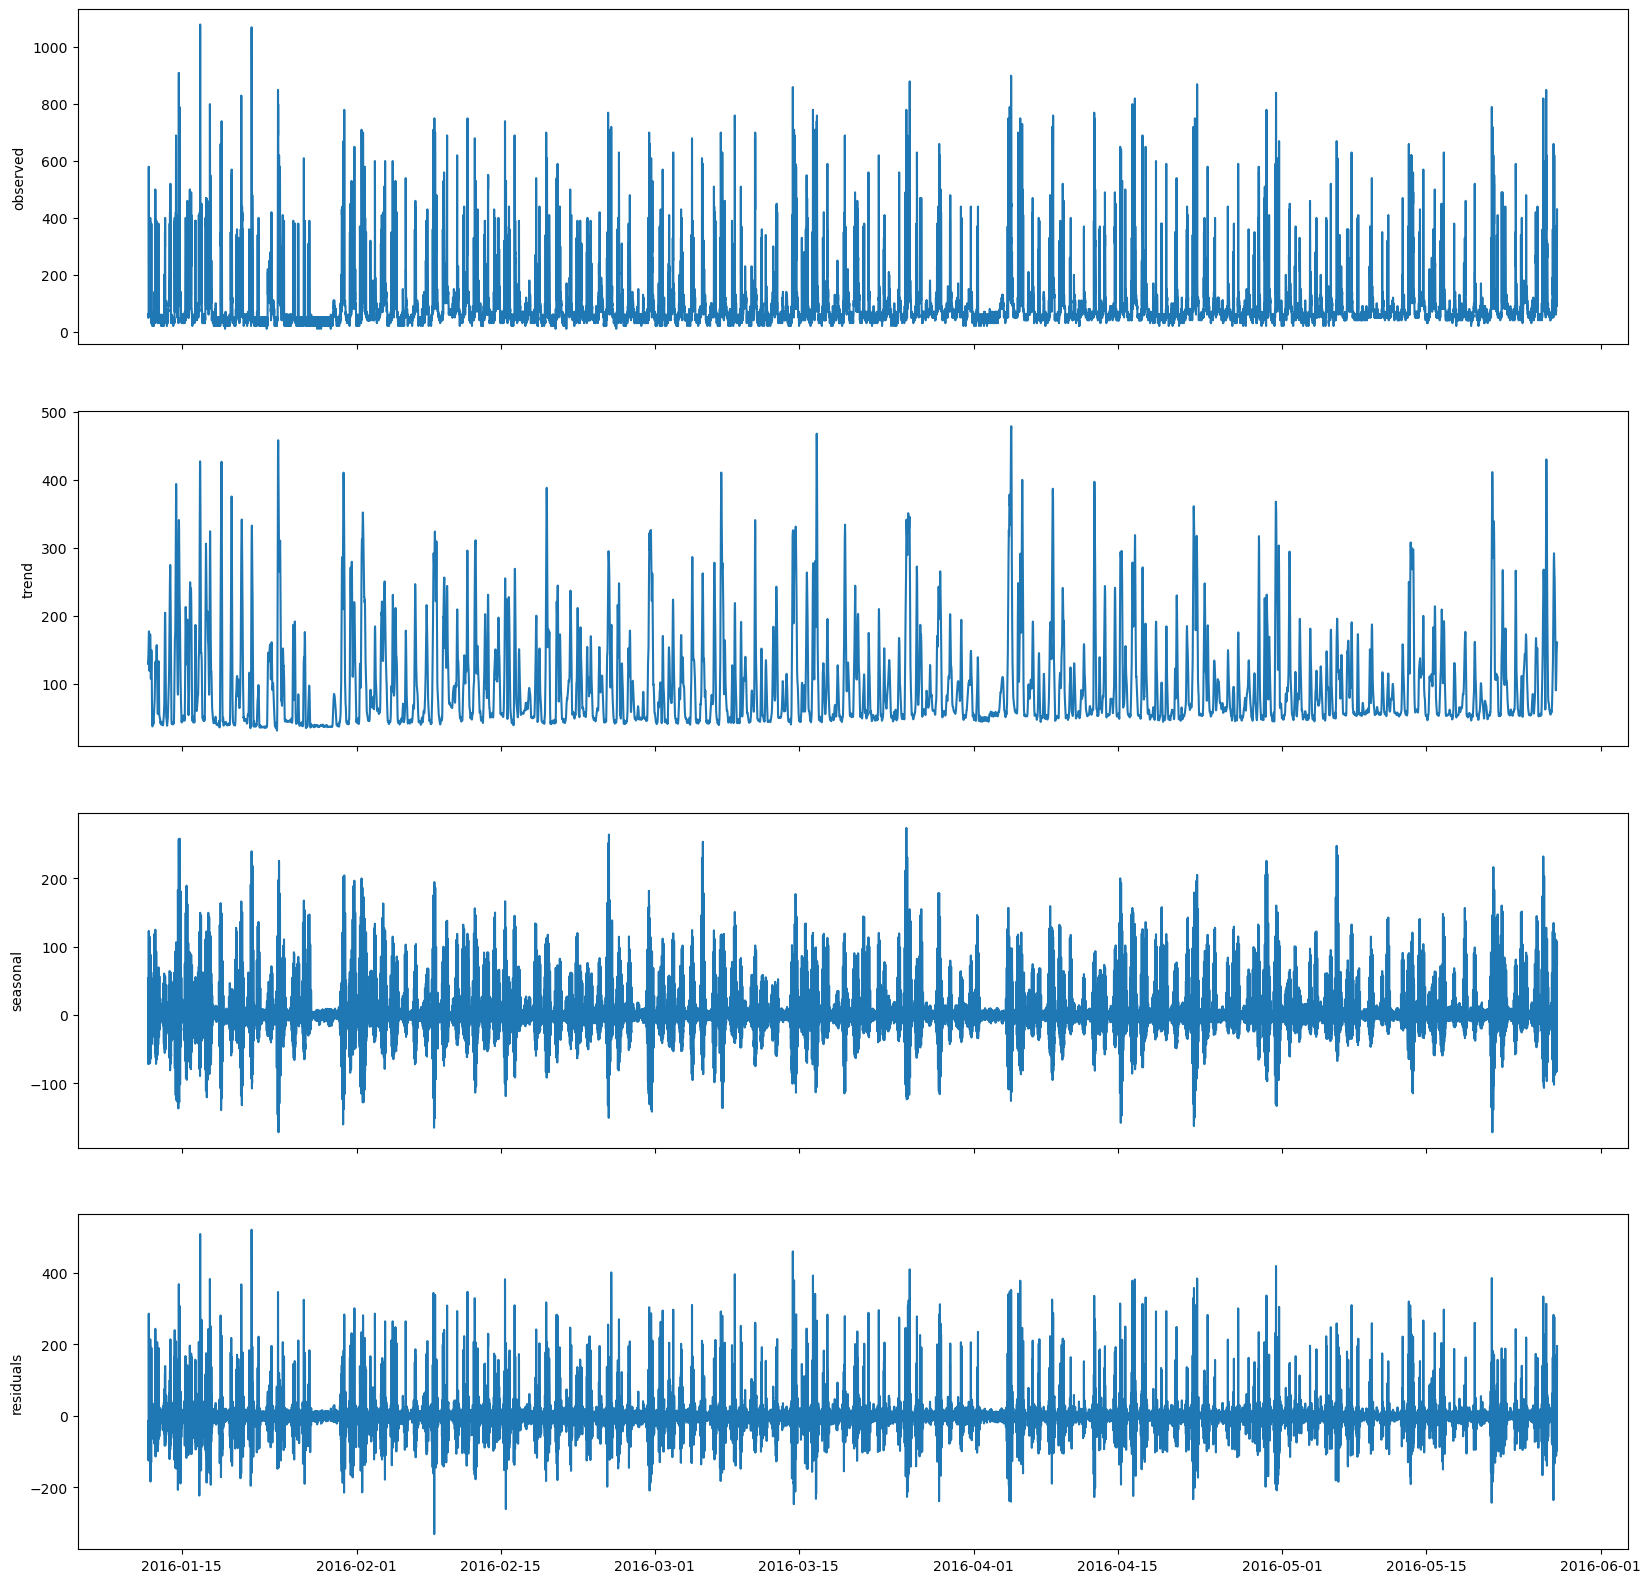

In [ ]:
# Performing seasonal decomposition with a different frequency
decomposition = STL(df_timeseries['Appliances'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20), sharex=True)

# Plot the decomposition components
ax1.plot(decomposition.observed)
ax2.plot(decomposition.trend)
ax3.plot(decomposition.seasonal)
ax4.plot(decomposition.resid)

ax1.set_ylabel('observed')
ax2.set_ylabel('trend')
ax3.set_ylabel('seasonal')
ax4.set_ylabel('residuals')

plt.show()


**Key observation**

1. **Trend**: The data does not show any pattern evolving over time indicating that there are no increases or decreases, in the use of energy by appliances.

2. **Seasonal Patterns**: The fluctuations, in energy consumption based on seasons seem to be spread out across the timeline.

The plot does not show any clear trend. However, there is a consistent seasonal change evident. Additionally, there are irregular fluctuations, which likely represent outliers and missing data points..

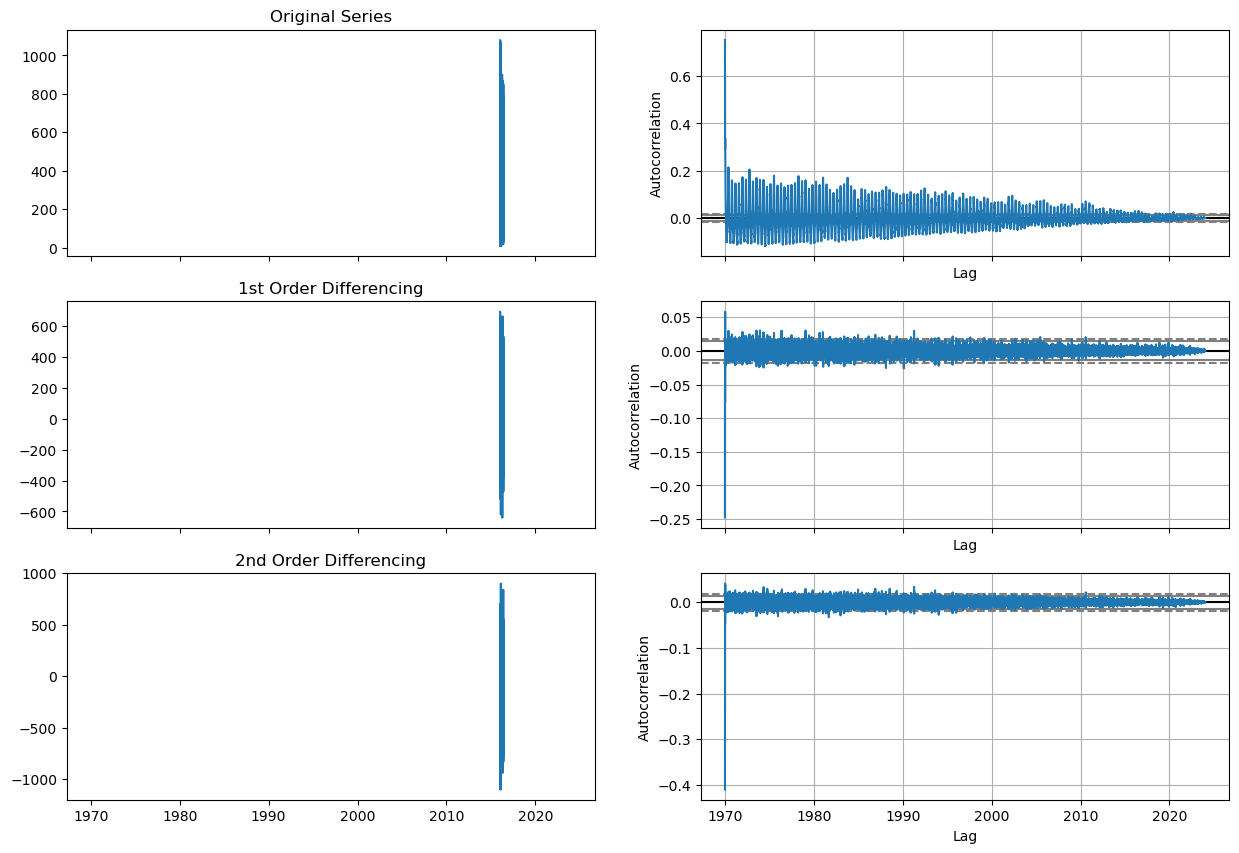

In [ ]:
# Reference Code from workshop
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True)
axes[0, 0].plot(df_timeseries.index, df_timeseries); axes[0, 0].set_title('Original Series')
autocorrelation_plot(df_timeseries, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_timeseries.index, df_timeseries.diff()); axes[1, 0].set_title('1st Order Differencing')
autocorrelation_plot(df_timeseries.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_timeseries.index, df_timeseries.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
autocorrelation_plot(df_timeseries.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

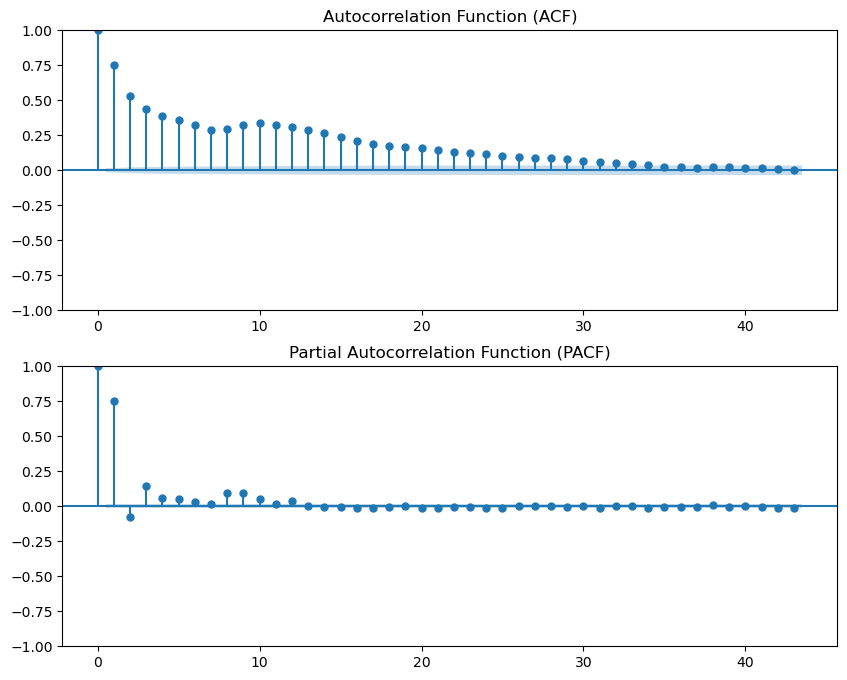

In [ ]:
# Reference Code from workshop
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting ACF
plot_acf(df_timeseries['Appliances'], ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plotting PACF
plot_pacf(df_timeseries['Appliances'], ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

Based on the PACF plot for the first-differenced data, the best value for q in an ARIMA model is likely q = 0 since there's no significant correlation beyond lag 0.
(Barger, 2022


In [ ]:
# Reference Code from workshop
result = adfuller(df_timeseries['Appliances'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -21.61637819803621
p-value: 0.0
Critical Values:
   1%: -3.430681600227742
   5%: -2.8616865555329394
   10%: -2.566848007525354


Here, augmented Dickey Fuller test (ADF) is used to test if the time series is stationarity or non-stationary.The null hypothesis of the ADF test is that the time series is non-stationary. In our case, p-value is 0 and ADF statistics is significantly lower than the critical values for all levels. Hence, we reject the null null hypothesis of non-stationarity. This concludes the time series is stationary and we can proceed forward.

### 3. Pre-process the data

In [ ]:
df_timeseries.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [ ]:
tf.random.set_seed(7)

In [ ]:
#80-20 Split
train_size = int(len(df_timeseries) * 0.8)

# Splitting the data into train and test sets
train_data = df_timeseries.iloc[:train_size]
test_data = df_timeseries.iloc[train_size:]

# Print the lengths of the train and test sets
print("Train set length:", len(train_data))
print("Test set length:", len(test_data))

Train set length: 15788
Test set length: 3947


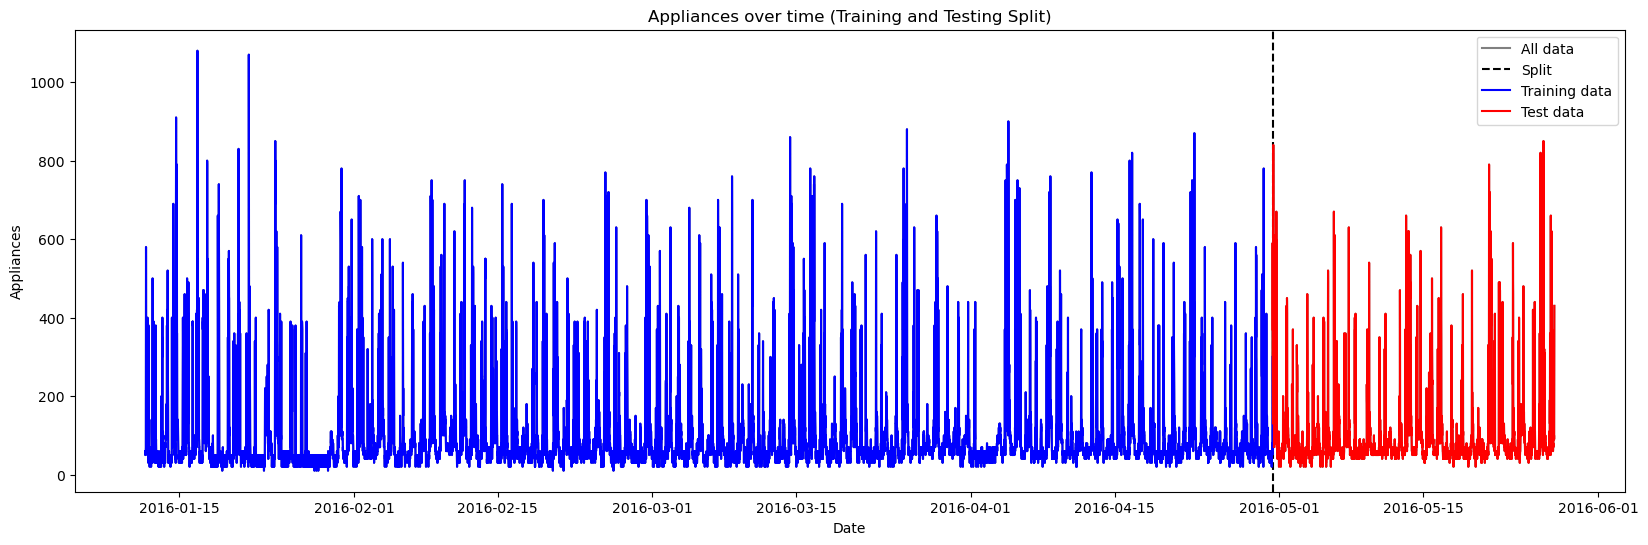

In [ ]:
# Plotting the Appliances over time
plt.figure(figsize=(20,6))
plt.plot(df_timeseries['Appliances'], color='gray', label='All data')

# Plotting the training and testing split
split_index = len(train_data)
plt.axvline(x=df_timeseries.index[split_index], color='black', linestyle='--', label='Split')

plt.plot(train_data, color='blue', label='Training data')
plt.plot(test_data, color='red', label='Test data')

plt.legend()
plt.title('Appliances over time (Training and Testing Split)')
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.show()

In [ ]:
data = dataset.copy()

In [ ]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [ ]:
#Scalling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scalar = scaler.fit_transform(df_timeseries)

In [ ]:
sessions_per_day = 12
look_back = sessions_per_day * 6
num_samples = len(data_scalar) - look_back - 1
train_X = np.empty((num_samples, look_back, 1))
train_y = np.empty(num_samples)

for i in range(num_samples):
    a = data_scalar[i:(i + look_back), 0]
    train_X[i] = a.reshape(-1, 1)
    train_y[i] = data_scalar[i + look_back, 0]

In [ ]:
num_samples_test = len(data_scalar) - look_back - 1
test_X = np.empty((num_samples_test, look_back, 1))
test_y = np.empty(num_samples_test)

# Extracting predicted test data, storing, and reshaping
for i in range(num_samples_test):
    a = data_scalar[i:(i + look_back), 0]
    test_X[i] = a.reshape(-1, 1)
    test_y[i] = data_scalar[i + look_back, 0]

In [ ]:
# target = np.cbrt(data['Appliances']) # target transform
x = data.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint'],axis=1)
y = data['Appliances']

In [ ]:
min_max_scaler = StandardScaler()
X_train_, X_test_, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = min_max_scaler.fit_transform(X_train_)
X_test= min_max_scaler.transform(X_test_)

In [ ]:
y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented.
(Barger, 2022



### 4. Implement, train and test prediction models

In [ ]:
# Refernece url : https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
model = auto_arima(train_data.values, max_p = 15 , start_q = 0, max_q = 15 , max_P = 15 , max_Q = 15 , m = 2, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,1)[2] intercept   : AIC=178009.962, Time=11.64 sec
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=191820.430, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[2] intercept   : AIC=178020.849, Time=6.34 sec
 ARIMA(0,0,1)(0,0,1)[2] intercept   : AIC=179580.068, Time=6.77 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=201686.541, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[2] intercept   : AIC=178008.497, Time=7.39 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=178394.945, Time=0.46 sec
 ARIMA(1,0,0)(0,0,2)[2] intercept   : AIC=178009.833, Time=9.46 sec
 ARIMA(1,0,0)(1,0,2)[2] intercept   : AIC=178012.200, Time=16.91 sec
 ARIMA(0,0,0)(0,0,1)[2] intercept   : AIC=188034.406, Time=2.98 sec
 ARIMA(1,0,1)(0,0,1)[2] intercept   : AIC=178009.523, Time=10.00 sec
 ARIMA(1,0,0)(0,0,1)[2]             : AIC=178753.066, Time=1.33 sec

Best model:  ARIMA(1,0,0)(0,0,1)[2] intercept
Total fit time: 73.598 seconds


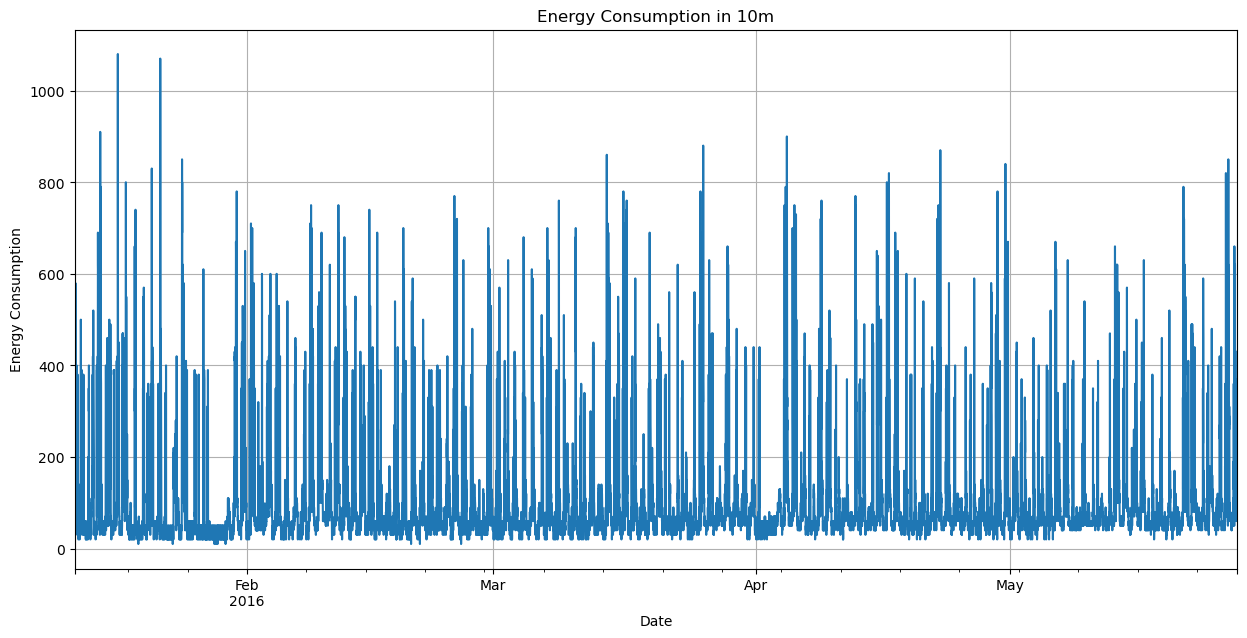

In [ ]:
# Reference code from workshop
plt.figure(figsize=(15, 7))
df_timeseries['Appliances'].plot()
plt.title('Energy Consumption in 10m')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

In [ ]:
order = (1, 0, 0)
seasonal_order = (0, 0, 1, 2)  # seasonal_period = 2
arima_model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order, trend='c')
# arima_model = ARIMA(train_data.values, order=(12,0,0))
arima_model = arima_model.fit()
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          Appliances   No. Observations:                15788
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 2)   Log Likelihood              -89000.249
Date:                             Sun, 17 Mar 2024   AIC                         178008.497
Time:                                     16:56:09   BIC                         178039.165
Sample:                                 01-11-2016   HQIC                        178018.647
                                      - 04-30-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.6109      1.096     16.062      0.000      15.462      19.760
ar.L1          0.8204      

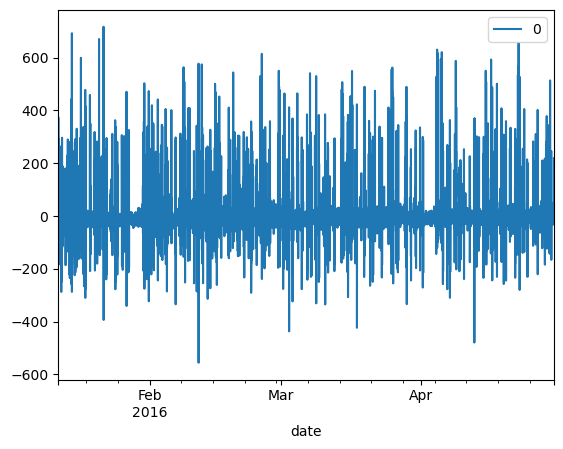

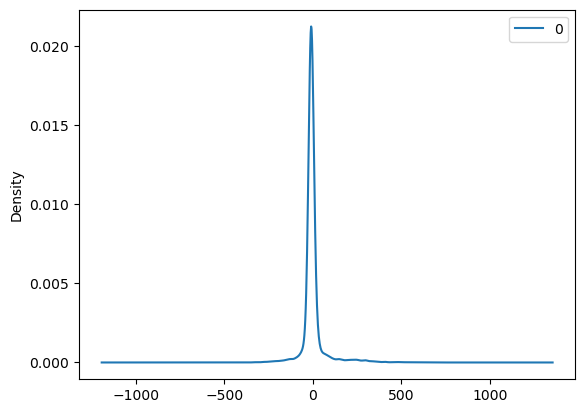

                  0
count  15788.000000
mean       0.002893
std       67.916456
min     -556.171373
25%      -18.684051
50%       -8.852212
75%        1.893671
max      717.191382


In [ ]:
# plot residual errors
residuals = pd.DataFrame(arima_model.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
len(test_data.values)

3947

In [ ]:
history = [x for x in train_data.values]
predictions = []

for test in range(len(test_data.values)):
    # Fit an ARIMA model on the training data
    model = ARIMA(history, order=order, seasonal_order=seasonal_order, trend='c')
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    # Get the actual observation from the test set
    obs = test_data.values[test]
    history.append(obs)
    print('Predicted = %f--->Expected=%f' % (yhat, obs))

error_arima = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % error_arima)
rmse_arima = np.sqrt(error_arima)
print('Test RMSE: %.3f' % rmse_arima)

Predicted = 261.744360--->Expected=370.000000
Predicted = 280.641254--->Expected=590.000000
Predicted = 481.846179--->Expected=320.000000
Predicted = 223.185946--->Expected=310.000000
Predicted = 301.593154--->Expected=260.000000
Predicted = 214.978134--->Expected=190.000000
Predicted = 181.090926--->Expected=150.000000
Predicted = 145.244716--->Expected=130.000000
Predicted = 129.964200--->Expected=290.000000
Predicted = 258.289679--->Expected=490.000000
Predicted = 390.214783--->Expected=840.000000
Predicted = 664.831150--->Expected=700.000000
Predicted = 509.904207--->Expected=430.000000
Predicted = 364.194767--->Expected=300.000000
Predicted = 278.544104--->Expected=310.000000
Predicted = 283.935247--->Expected=290.000000
Predicted = 249.920889--->Expected=300.000000
Predicted = 262.823346--->Expected=240.000000
Predicted = 205.441653--->Expected=160.000000
Predicted = 153.166227--->Expected=90.000000
Predicted = 99.851743--->Expected=70.000000
Predicted = 86.692099--->Expected=80.

In [ ]:
# result = pd.concat([test_data, ARIMA_pred], axis=1)
# Convert ARIMA_pred to DataFrame
arima_pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['predicted_mean'])

# Concatenate test_data and ARIMA_pred_df
result = pd.concat([test_data, arima_pred_df], axis=1)

In [ ]:
result

,Appliances,predicted_mean
date,,
2016-04-30 08:20:00,370,261.744360
2016-04-30 08:30:00,590,280.641254
2016-04-30 08:40:00,320,481.846179
2016-04-30 08:50:00,310,223.185946
2016-04-30 09:00:00,260,301.593154
...,...,...
2016-05-27 17:20:00,100,93.140696
2016-05-27 17:30:00,90,103.833123
2016-05-27 17:40:00,270,90.051323


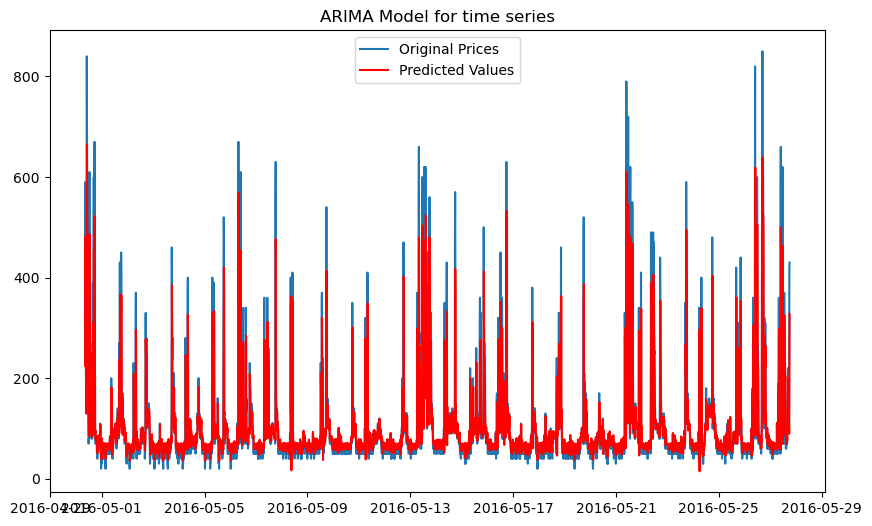

In [ ]:
# Plot the original closing prices and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result['Appliances'], label="Original Prices")
plt.plot(result['predicted_mean'], color='red', label="Predicted Values")
plt.title("ARIMA Model for time series")
plt.legend()
plt.show()

In [ ]:
error_arima = mean_squared_error(result['Appliances'], result['predicted_mean'])
print('Test MSE: %.3f' % error_arima)
rmse_arima = np.sqrt(error_arima)
print('Test RMSE: %.3f' % rmse_arima)

Test MSE: 3685.327
Test RMSE: 60.707


### LSTM

LSTM networks are suitable for capturing temporal dependencies and short-term fluctuations in the data, while ConvLSTM networks are advantageous for incorporating spatial information and capturing both spatial and temporal patterns simultaneously. (Cascone, et al., 2023)

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_timeseries)
look_back=24*6    # 144 ten-minute sessions per day

# extracting input pairs from a dataset, storing and reshaping
train_X,train_y=[],[]
for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    train_X.append(a)
    train_y.append(dataset[i + look_back, 0])
train_X,train_y = np.array(train_X),np.array(train_y)
train_X=np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
# extracting predicted test data
test_X,test_y=[],[]
for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    test_X.append(a)
    test_y.append(dataset[i + look_back, 0])
test_X,test_y = np.array(test_X),np.array(test_y)
test_X=np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

The LSTM model is constructed with two LSTM layers, each featuring 32 memory units. The first LSTM layer is configured to return sequences, maintaining the temporal structure of the input data, while the second LSTM layer condenses the information into a single representation for subsequent prediction. Following the LSTM layers, a Dense layer with one unit is added, facilitating the generation of continuous output suitable for regression tasks. During compilation, the model is optimized using the Adam optimizer and trained to minimize mean squared error, a commonly used loss function for regression problems.(Cascone, et al., 2023)

In [ ]:
#Reference URL- https://www.sciencedirect.com/science/article/pii/S2214579622000545
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(look_back,1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 144, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_X,train_y,epochs=50,batch_size=32,verbose=2)

Epoch 1/50

613/613 - 32s - loss: 0.0055 - 32s/epoch - 51ms/step
Epoch 2/50
613/613 - 28s - loss: 0.0039 - 28s/epoch - 45ms/step
Epoch 3/50
613/613 - 27s - loss: 0.0038 - 27s/epoch - 45ms/step
Epoch 4/50
613/613 - 27s - loss: 0.0038 - 27s/epoch - 44ms/step
Epoch 5/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 44ms/step
Epoch 6/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 43ms/step
Epoch 7/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 44ms/step
Epoch 8/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 44ms/step
Epoch 9/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 44ms/step
Epoch 10/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 44ms/step
Epoch 11/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 44ms/step
Epoch 12/50
613/613 - 27s - loss: 0.0037 - 27s/epoch - 43ms/step
Epoch 13/50
613/613 - 28s - loss: 0.0037 - 28s/epoch - 45ms/step
Epoch 14/50
613/613 - 29s - loss: 0.0037 - 29s/epoch - 47ms/step
Epoch 15/50
613/613 - 29s - loss: 0.0037 - 29s/epoch - 47ms/step
Epoch 16/50
613/613 - 28s - loss:

In [ ]:
# make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([test_y])

613/613 [==============================] - 10s 17ms/step


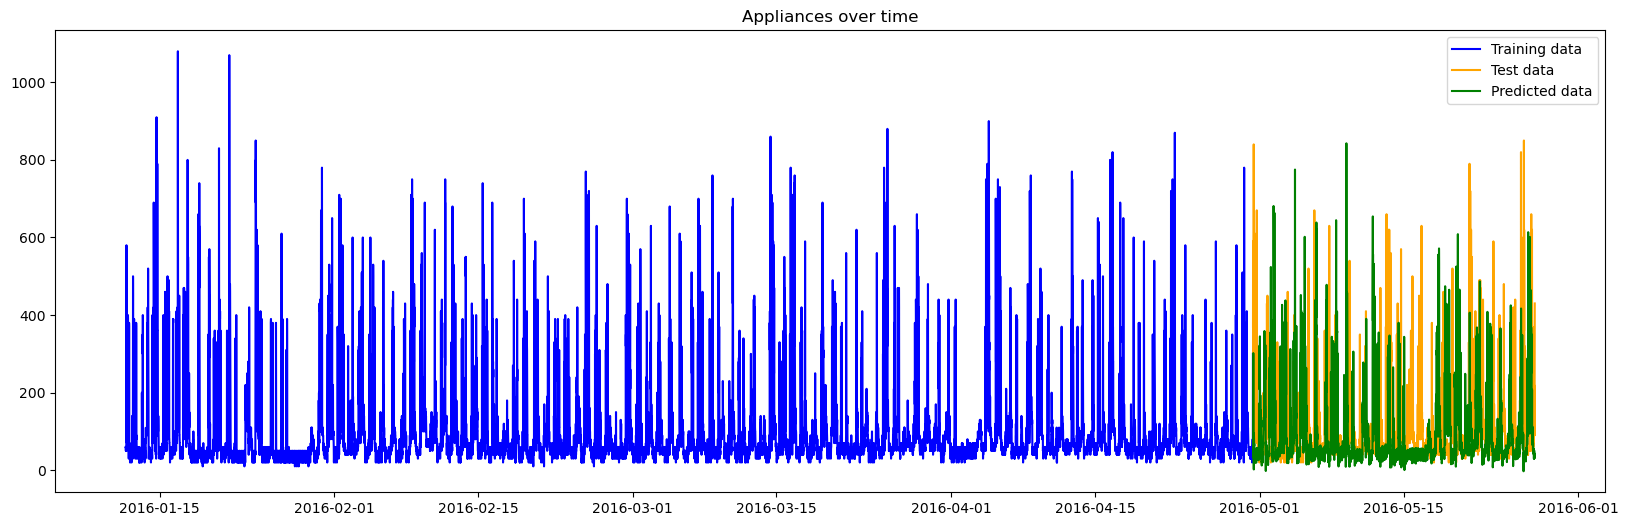

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='orange')
plt.plot(test_data.index, testPredict [:3947], color='green')
plt.legend(['Training data','Test data','Predicted data'])
plt.title('Appliances over time')
plt.show()


In [ ]:
# r2 score
r2_lstm_test = r2_score(testy[0], testPredict[:,0])
r2_lstm_train = r2_score(trainy[0], trainPredict[:,0])

print("R-squared score for LSTM on training set:", r2_lstm_train)
print("R-squared score for LSTM on test set:", r2_lstm_test)

R-squared score for LSTM on training set: 0.6498879262163348
R-squared score for LSTM on test set: 0.6498879262163348


In [ ]:
#calculate root mean squared error
error_lstm = mean_squared_error(testy[0],  testPredict[:,0])
print('Test MSE: %.3f' % error_lstm)
rmse_lstm = np.sqrt(error_lstm)
print('Test RMSE: %.3f' % rmse_lstm)

Test MSE: 3673.288
Test RMSE: 60.608


### Conv-LSTM

(ConvLSTM) architecture combines the strengths of both convolutional and LSTM layers to effectively learn temporal dependencies while preserving spatial information. Unlike traditional LSTMs, ConvLSTM integrates convolutional operations within the LSTM cell, enabling it to capture spatial features in multi-dimensional data. (Cascone, et al., 2023)

In [ ]:
#https://www.sciencedirect.com/science/article/pii/S2214579622000545
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 142, 64)           256       
                                                                 
 conv1d_3 (Conv1D)           (None, 140, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 70, 64)            0         
 D)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 70, 32)            12416     
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                     

In [ ]:
model.fit(train_X,train_y,epochs=70,batch_size=32,verbose=2)

Epoch 1/70
613/613 - 17s - loss: 0.0057 - 17s/epoch - 28ms/step
Epoch 2/70
613/613 - 14s - loss: 0.0040 - 14s/epoch - 23ms/step
Epoch 3/70
613/613 - 14s - loss: 0.0038 - 14s/epoch - 23ms/step
Epoch 4/70
613/613 - 14s - loss: 0.0038 - 14s/epoch - 24ms/step
Epoch 5/70
613/613 - 15s - loss: 0.0037 - 15s/epoch - 25ms/step
Epoch 6/70
613/613 - 16s - loss: 0.0037 - 16s/epoch - 26ms/step
Epoch 7/70
613/613 - 16s - loss: 0.0037 - 16s/epoch - 26ms/step
Epoch 8/70
613/613 - 15s - loss: 0.0036 - 15s/epoch - 25ms/step
Epoch 9/70
613/613 - 15s - loss: 0.0036 - 15s/epoch - 25ms/step
Epoch 10/70
613/613 - 15s - loss: 0.0036 - 15s/epoch - 25ms/step
Epoch 11/70
613/613 - 15s - loss: 0.0036 - 15s/epoch - 25ms/step
Epoch 12/70
613/613 - 16s - loss: 0.0035 - 16s/epoch - 26ms/step
Epoch 13/70
613/613 - 16s - loss: 0.0035 - 16s/epoch - 25ms/step
Epoch 14/70
613/613 - 16s - loss: 0.0035 - 16s/epoch - 25ms/step
Epoch 15/70
613/613 - 16s - loss: 0.0035 - 16s/epoch - 25ms/step
Epoch 16/70
613/613 - 15s - loss: 

In [ ]:
# make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([test_y])

613/613 [==============================] - 5s 8ms/step


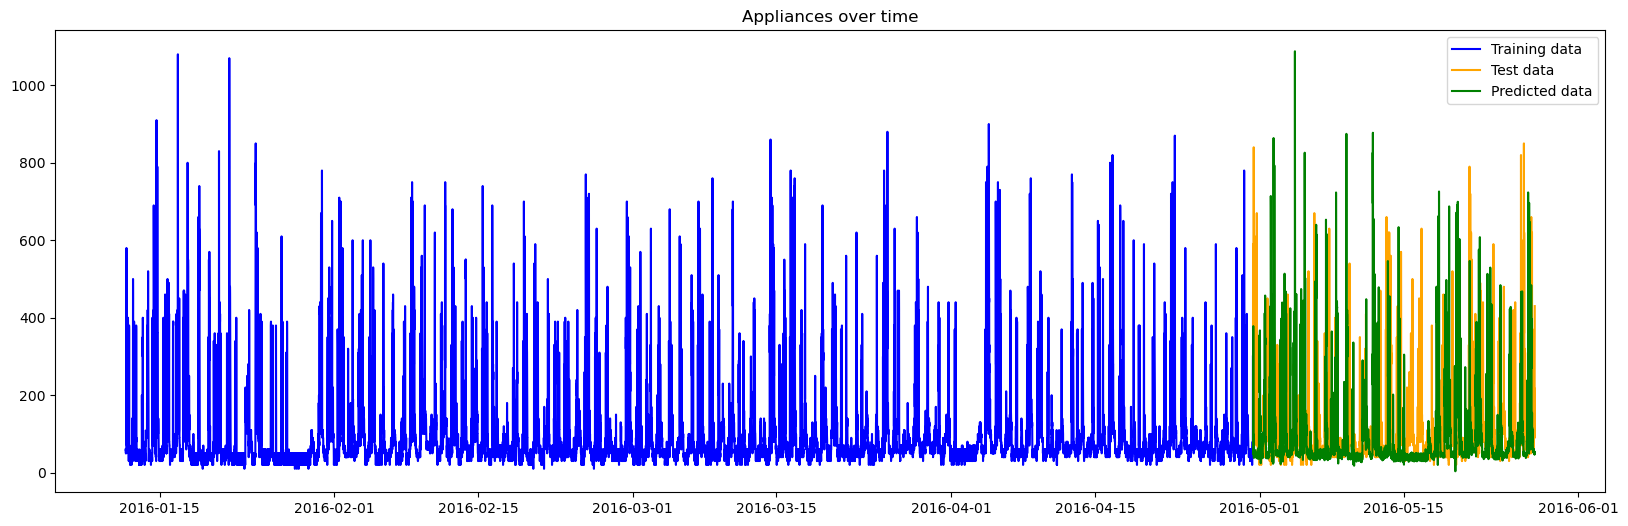

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='orange')
plt.plot(test_data.index, testPredict [:3947], color='green')
plt.legend(['Training data','Test data','Predicted data'])
plt.title('Appliances over time')
plt.show()


In [ ]:
# r2 score
r2_CNN_lstm_test = r2_score(testy[0], testPredict[:,0])
r2_CNN_lstm_train = r2_score(trainy[0], trainPredict[:,0])

print("R-squared score for LSTM on training set:", r2_CNN_lstm_train)
print("R-squared score for LSTM on test set:", r2_CNN_lstm_test)

R-squared score for LSTM on training set: 0.8529068215642535
R-squared score for LSTM on test set: 0.8529068215642535


In [ ]:
#calculate root mean squared error
error_lstm_CNN = mean_squared_error(testy[0],  testPredict[:,0])
print('Test MSE: %.3f' % error_lstm_CNN)
rmse_lstm_CNN = np.sqrt(error_lstm_CNN)
print('Test RMSE: %.3f' % rmse_lstm_CNN)

Test MSE: 1543.265
Test RMSE: 39.284


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results


Compare with the results you have obtained in Assignment 1a.

### 5.1 Best Ridge Linear Model

In [ ]:
ridge = Ridge(alpha=4.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
ridge_score_train = r2_score(y_train, y_train_pred)
y_test_pred = ridge.predict(X_test)
ridge_score_test = r2_score(y_test, y_test_pred)
rmse_rd = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Coefficients of the Ridge model
ridge_coefficients = ridge.coef_

print("R-squared score for Ridge Regression on training set:", ridge_score_train)
print("R-squared score for Ridge Regression on test set:", ridge_score_test)
print("RMSE for Ridge Regression model:", rmse_rd)
print("Coefficients of the Ridge model:", ridge_coefficients)

R-squared score for Ridge Regression on training set: 0.16119470395640467
R-squared score for Ridge Regression on test set: 0.1675223561339192
RMSE for Ridge Regression model: 91.27255675140448
Coefficients of the Ridge model: [[ 1.56838248e+01  1.23587716e+00  6.29965528e+01 -3.87675095e+01
  -5.41048740e+01  5.13494643e+01  1.33265517e+01 -9.22922900e+00
   7.61246111e-01 -3.04669630e+00  1.93589894e+00  4.30722679e+01
   9.21171164e+00  3.51338610e+00 -8.57207522e+00  1.41355763e+01
  -2.35031486e+01 -2.93137839e+01 -3.93752791e+00 -2.94873404e+01
   2.29756185e-01 -3.27482683e+00  3.44709370e-02  3.44709370e-02]]


### 5.2 Best Random Forest Regressor

In [ ]:
# Creating and fitting the Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions on training set
y_train_pred = random_forest.predict(X_train)

# R-squared score on training set
rf_score_train = r2_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = random_forest.predict(X_test)

# R-squared score on test set
rf_score_test = r2_score(y_test, y_test_pred)

rmse_rf=np.sqrt(mean_squared_error(y_test, y_test_pred))


print("R-squared score for Random Forest Regressor on training set:", rf_score_train)
print("R-squared score for Random Forest Regressor on test set:", rf_score_test)
print("RMSE for Random Forest Regressor model:", rmse_rf)

R-squared score for Random Forest Regressor on training set: 0.8601695587518743
R-squared score for Random Forest Regressor on test set: 0.4918007482425947
RMSE for Random Forest Regressor model: 71.31336625255278


### 5.3 Best Gradient Boosting

In [ ]:
# Creating and fitting the Gradient Boosting Regressor model with the best parameters
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predictions on training set
y_train_pred = gradient_boosting.predict(X_train)

# R-squared score on training set
gb_score_train = r2_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = gradient_boosting.predict(X_test)

# R-squared score on test set
gb_score_test = r2_score(y_test, y_test_pred)

# Root mean squared error
rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R-squared score for Gradient Boosting Regressor on training set:", gb_score_train)
print("R-squared score for Gradient Boosting Regressor on test set:", gb_score_test)
print("RMSE for Gradient Boosting Regressor model:", rmse_gb)


R-squared score for Gradient Boosting Regressor on training set: 0.5781423767638617
R-squared score for Gradient Boosting Regressor on test set: 0.3768719907146617
RMSE for Gradient Boosting Regressor model: 78.96644067057964


 ### 5.4 Best SVM model

In [ ]:
best_svm_model = SVR(C=10, gamma='scale', kernel='rbf')
best_svm_model.fit(X_train, y_train)
y_train_pred = best_svm_model.predict(X_train)
y_test_pred = best_svm_model.predict(X_test)
svm_train_r2_score = r2_score(y_train, y_train_pred)
svm_test_r2_score = r2_score(y_test, y_test_pred)
svm_rmse_test_score = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train R² score:", svm_train_r2_score)
print("Test R² score:", svm_test_r2_score)
print("RMSE test score:", svm_rmse_test_score)

Train R² score: 0.11109352713516563
Test R² score: 0.1153959288796711
RMSE test score: 94.08673403769329


In [ ]:
models = [
    {'Name': 'Ridge Regression',
     'Train R² score': ridge_score_train,
     'Test R² score': ridge_score_test,
      'RMSE test score': rmse_rd/100
    },
    {'Name': 'Random Forest Regressor',
     'Train R² score': rf_score_train,
     'Test R² score': rf_score_test,
     'RMSE test score': rmse_rf/100
    },
    {'Name': 'Gradient Boosting Regressor',
     'Train R² score': gb_score_train,
     'Test R² score': gb_score_test,
     'RMSE test score': rmse_gb/100
    },
    {'Name': 'Support Vector Machine',
    'Train R² score': svm_train_r2_score,
    'Test R² score': svm_test_r2_score,
     'RMSE test score': svm_rmse_test_score/100
    },
    {'Name': 'LSTM',
     'Train R² score': r2_lstm_train,
     'Test R² score': r2_lstm_test,
     'RMSE test score': rmse_lstm/100
    },
    {'Name': 'CNN-LSTM',
     'Train R² score': r2_CNN_lstm_train,
     'Test R² score': r2_CNN_lstm_test,
     'RMSE test score': rmse_lstm_CNN/100
    },
]

models_df = pd.DataFrame(models)
print(models_df)

                          Name  Train R² score  Test R² score  RMSE test score
0             Ridge Regression        0.161195       0.167522         0.912726
1      Random Forest Regressor        0.860170       0.491801         0.713134
2  Gradient Boosting Regressor        0.578142       0.376872         0.789664
3       Support Vector Machine        0.111094       0.115396         0.940867
4                         LSTM        0.649888       0.649888         0.606077
5                     CNN-LSTM        0.852907       0.852907         0.392844


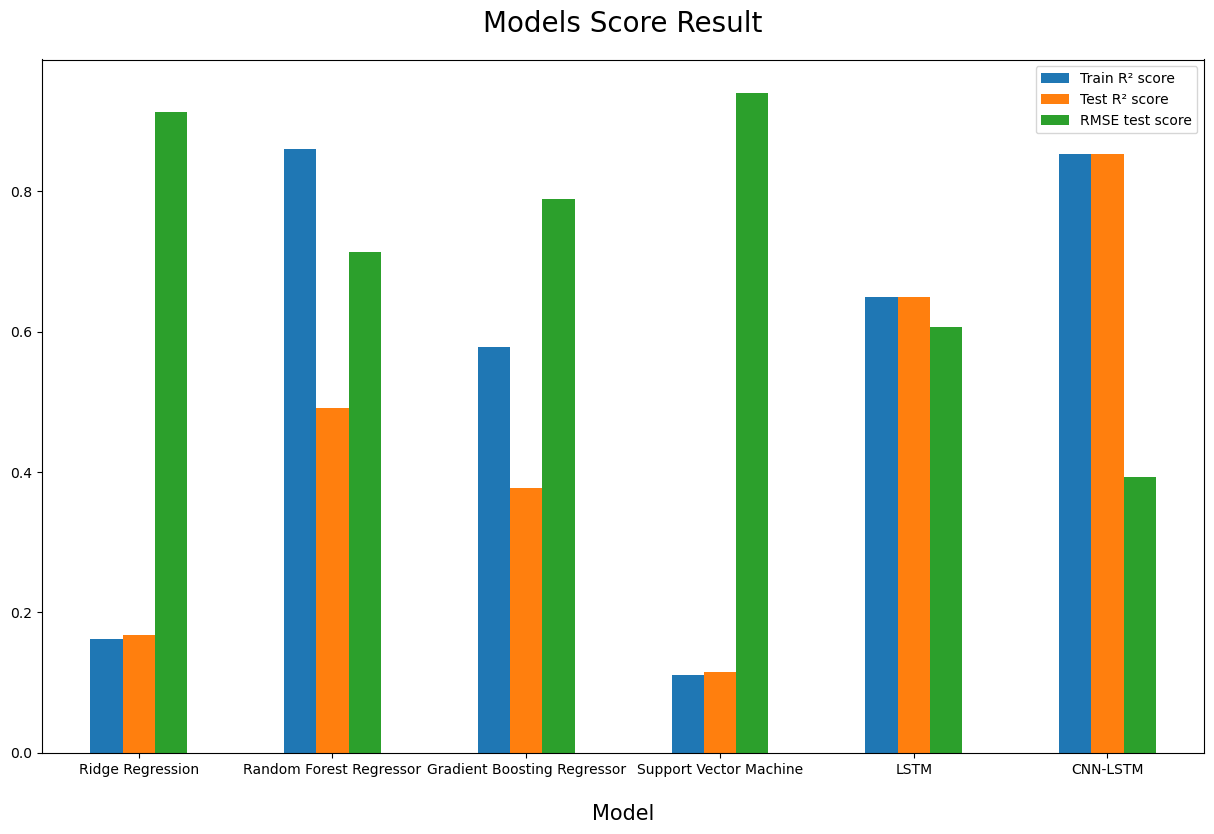

In [ ]:
models_df.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Models Score Result', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()


In [ ]:
# Create a list of dictionaries containing model results
models = [
    {'Name': 'Ridge Regression',
     'RMSE test score': rmse_rd},

    {'Name': 'Random Forest Regressor',
     'RMSE test score': rmse_rf},

    {'Name': 'Gradient Boosting Regressor',
     'RMSE test score': rmse_gb},

    {'Name': 'Support Vector Machine',
    'RMSE test score': svm_rmse_test_score},

    {'Name': 'LSTM',
    'RMSE test score': rmse_lstm},
    {'Name': 'Conv-LSTM',
    'RMSE test score': rmse_lstm_CNN},
    {'Name': 'ARIMA',
    'RMSE test score': rmse_arima}

]

# Convert the list of dictionaries to a DataFrame
models_df = pd.DataFrame(models)

# Display the DataFrame
print(models_df)

                          Name  RMSE test score
0             Ridge Regression        91.272557
1      Random Forest Regressor        71.313366
2  Gradient Boosting Regressor        78.966441
3       Support Vector Machine        94.086734
4                         LSTM        60.607655
5                    Conv-LSTM        39.284407
6                        ARIMA        60.706891


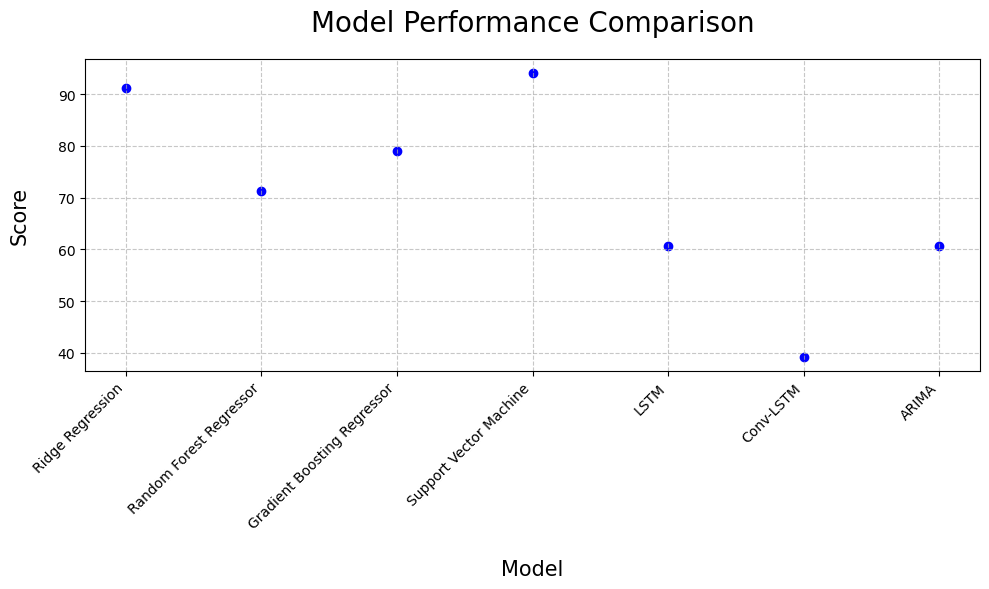

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(models_df['Name'], models_df['RMSE test score'], color='blue')
plt.title('Model Performance Comparison', fontsize=20, pad=20)
plt.xlabel('Model', fontsize=15, labelpad=20)
plt.ylabel('Score', fontsize=15, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

After completing this assignment, I have now understood the time series analysis by forecasting the data using ARIMA and LSTM. I understood how ARIMA models combines autoregression, differencing, and moving average techniques to model and predict time series data. Using the data pre-processing techniques from Assignment 1, I continued time series analysis using the STL method with decomposition of trend, seasonality, and residuals. This approach greatly facilitated the identification of underlying trends and seasonal patterns within the data. I learned the concept of stationarity, a prerequisite for ARIMA modeling before implementing it. I learned to interpret ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to determine the appropriate parameters for the ARIMA model, namely p, d, and q.

Secondly LSTM and ConvLSTM was used to forecast energy consumption. Implementing LSTM and ConvLSTM models has enhanced my understanding of their architecture and applications in various domains as well. One of the major take away was that a target needs to be chosen carefully which can be forecasted. I choose two metrics for assessing model performance: the R^2 score and root mean square error (RMSE). These metrics were selected specifically for evaluating regression prediction models.

To improve these models we can consider ConvLSTM Encoder-Decoder architecture. This approach capitalizes on ConvLSTM's ability to extract spatial information alongside temporal dependencies, thus enhancing the model's capability to capture complex patterns in energy consumption. Besides, we can consider enhancing feature engineering, exploring advanced neural network architectures, optimizing hyperparameters, leveraging ensemble learning, and applying data augmentation techniques.

### 7. References

Barger, C. (2022, 04 2022). ARIMA models for Time Series Analysis and Forecasting. Retrieved from https://www.sciencedirect.com: https://medium.com/codex/arima-models-for-time-series-analysis-and-forecasting-508c4a060f85


Cascone, L., Sadiq, S., Ullah, S., Mirjalili, S., Rehman Siddiqui, H., & Umer , M. (2023, February 28). Predicting Household Electric Power Consumption Using Multi-step Time Series with Convolutional LSTM. Retrieved from https://www.sciencedirect.com/science/article/pii/S2214579622000545: https://doi.org/10.1016/j.bdr.2022.10036

Juan Josua(2021). Average Energy Consumptions. RPubs. Retrieved from https://rpubs.com/jujuanjosua/average-energy-consumptions